In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('data/aug_train.csv')

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Feature: `city`

In [13]:
print(f'Level of cardinality: {len(df.city.unique())}')

Level of cardinality: 123


In [39]:
print(f'Percent of missing: {df.city.isnull().sum() / len(df):0.2f}')

Percent of missing: 0.00


In [86]:
df[df['target'] == 0].city.value_counts().index

Index(['city_103', 'city_16', 'city_114', 'city_21', 'city_160', 'city_136',
       'city_67', 'city_75', 'city_104', 'city_102',
       ...
       'city_155', 'city_111', 'city_129', 'city_18', 'city_25', 'city_121',
       'city_179', 'city_107', 'city_139', 'city_140'],
      dtype='object', length=122)

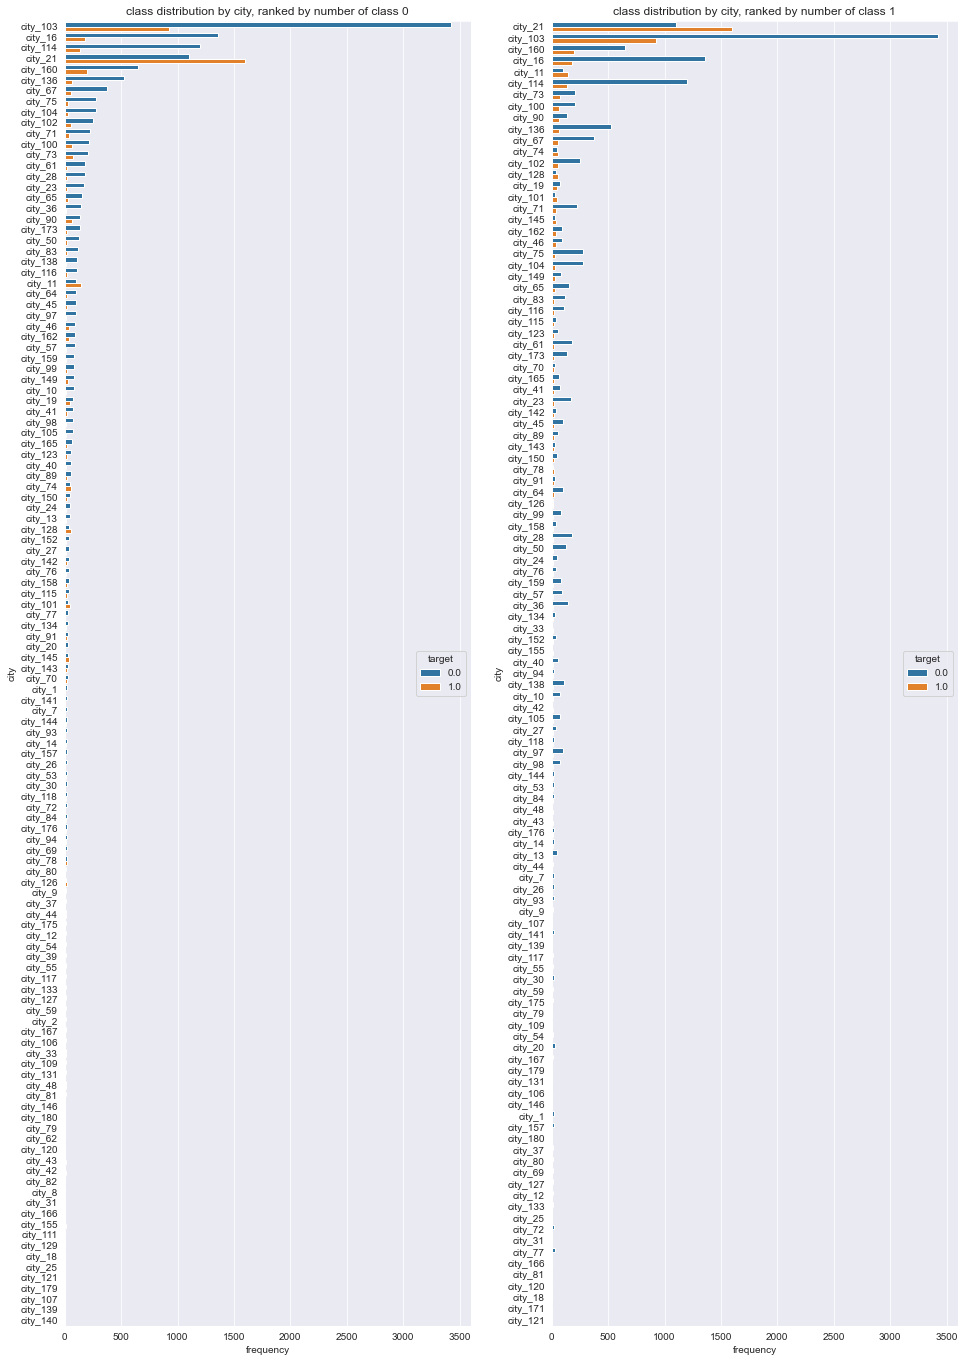

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(16, 24))
sns.countplot(y='city', hue='target', data=df, ax=ax[0], order = df[df['target'] == 0].city.value_counts().index)
sns.countplot(y='city', hue='target', data=df, ax=ax[1], order = df[df['target'] == 1].city.value_counts().index)
ax[0].set_xlabel('frequency')
ax[0].set_title('class distribution by city, ranked by number of class 0');
ax[1].set_xlabel('frequency')
ax[1].set_title('class distribution by city, ranked by number of class 1');

# Feature: `city_development_index`

In [44]:
df.city_development_index.describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [40]:
print(f'Percent of missing: {df.city_development_index.isnull().sum() / len(df):0.2f}')

Percent of missing: 0.00


In [102]:
df['target_cat'] = np.where(df.target == 1, 'class 1', 'class 0')

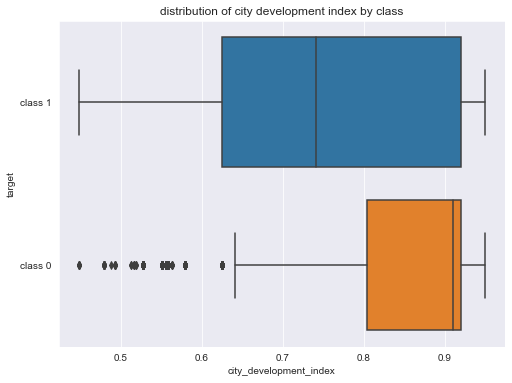

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(x='city_development_index', y='target_cat', data=df, ax=ax)
ax.set_ylabel('target')
ax.set_title('distribution of city development index by class');

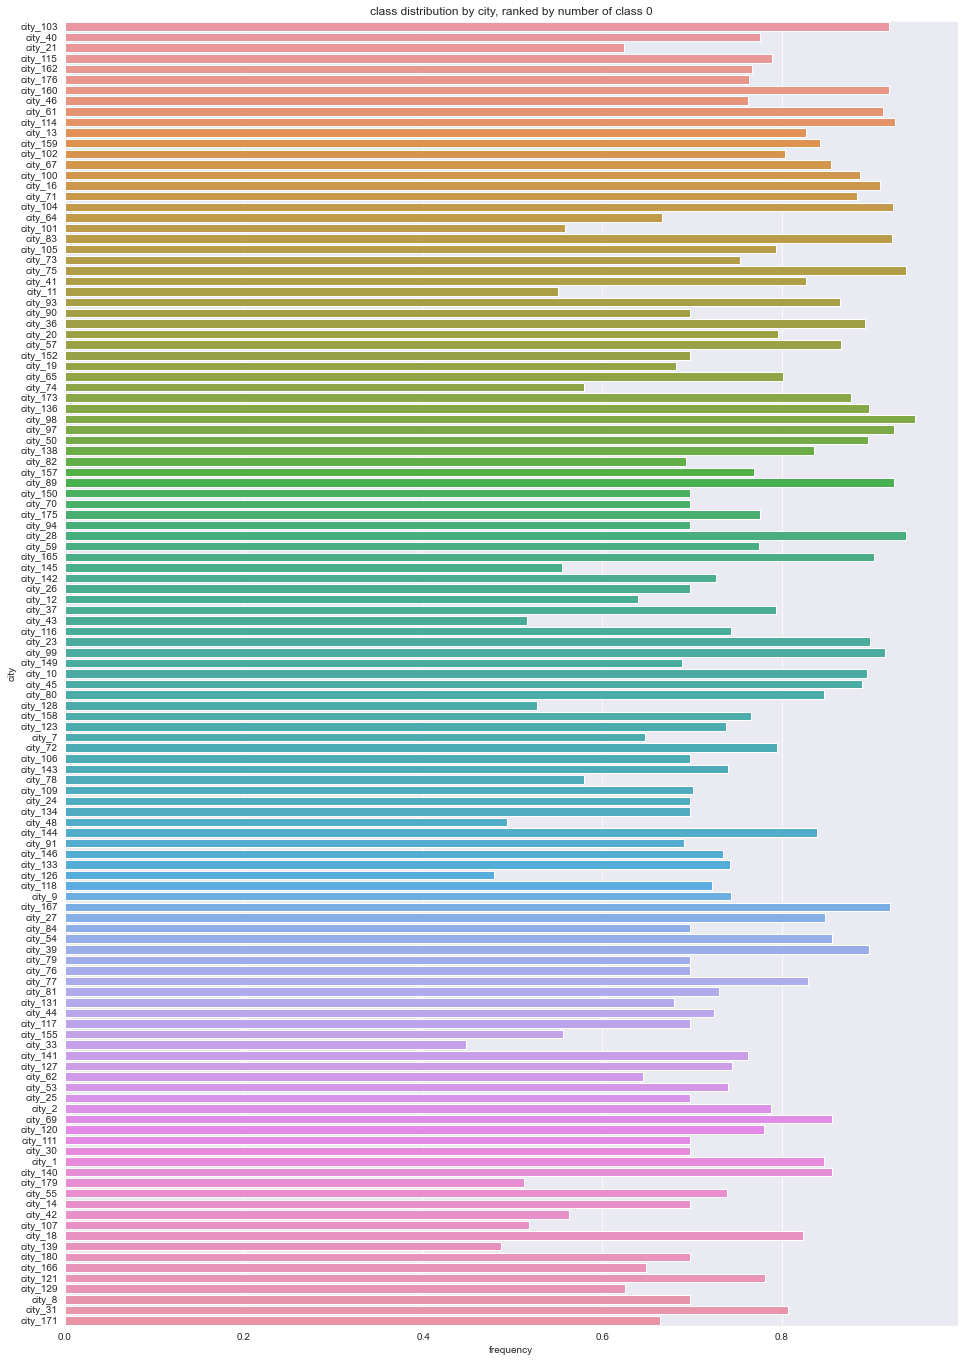

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(16, 24))
sns.barplot(y='city', x='city_development_index', data=df, ax=ax, order=)
ax.set_xlabel('frequency')
ax.set_title('class distribution by city, ranked by number of class 0');

# Feature: `gender`

In [14]:
print(f'Level of cardinality: {len(df.gender.unique())}')

Level of cardinality: 4


In [38]:
print(f'Percent of missing: {df.gender.isnull().sum() / len(df):0.2f}')

Percent of missing: 0.24


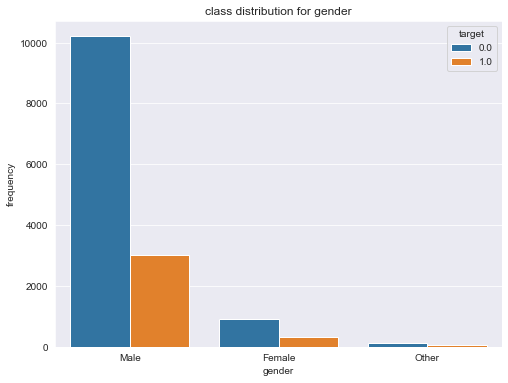

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='gender', hue='target', data=df, ax=ax)
ax.set_ylabel('frequency')
ax.set_title('class distribution by gender');